#### In this preprocessing file, I will import a dataset containing 6918 user reviews. On this dataset, I am going to perform t-test and find the p value. Next I will train and test models using different algorithms and find their accuracy. The model with higher accuracy will be selected and a final model will be created.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle
import warnings
warnings.filterwarnings("ignore")


C:\Users\admin\AppData\Local\Temp\ipykernel_14948\3583701683.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('reviews[1].txt',sep = '\t', names =['Reviews','Comments'])

In [3]:
df

,Reviews,Comments
0,1,👍
1,1,😍
2,1,Da Vinci Code is fun 😂 to watch .
3,1,🤩
4,1,Da Vinci Code is ultimate 💥.
...,...,...
6913,0,😢.
6914,0,🙄
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,😐


In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# Read the dataset
 # Replace 'your_dataset.csv' with the path to your dataset file

# Encoding 'Comments' column into categorical values
df['Comments'] = pd.Categorical(df['Comments'])

# Create a contingency table
contingency_table = pd.crosstab(df['Reviews'], df['Comments'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Reviews and Comments.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Reviews and Comments.")


Chi-Square Statistic: 6918.0
p-value: 0.0
Degrees of Freedom: 1297
Expected Frequencies Table:
[[0.43003758 0.43003758 0.43003758 ... 0.43003758 0.43003758 0.43003758]
 [0.56996242 0.56996242 0.56996242 ... 0.56996242 0.56996242 0.56996242]]
Reject the null hypothesis: There is a significant association between Reviews and Comments.


In [5]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import words
from textblob import TextBlob

# Sample data


# Convert 'Reviews' column to string data type
#df['Comments'] = df['Commnt'].astype(str)

# Lowercasing
df['Comments'] = df['Comments'].str.lower()



In [6]:
import pandas as pd

# Assuming df is your DataFrame containing the 'Comments' column
df['Comments'] = df['Comments'].astype(str)  # Convert to string type
df['Comments'] = df['Comments'].apply(word_tokenize)  # Apply word_tokenize function


In [7]:
df

,Reviews,Comments
0,1,[👍]
1,1,[😍]
2,1,"[da, vinci, code, is, fun, 😂, to, watch, .]"
3,1,[🤩]
4,1,"[da, vinci, code, is, ultimate, 💥, .]"
...,...,...
6913,0,"[😢, .]"
6914,0,[🙄]
6915,0,"[as, i, sit, here, ,, watching, the, mtv, movi..."
6916,0,[😐]


In [8]:
stopset = set(stopwords.words('english'))
stopset=list(stopset)


In [9]:
# Convert 'Comments' column to strings
from sklearn.preprocessing import StandardScaler
df['Comments'] = df['Comments'].astype(str)

# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stopset)
X = vectorizer.fit_transform(df['Comments'])

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

In [10]:
# Convert 'Comments' column to strings


In [11]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Step 3: Dimensionality Reduction using TruncatedSVD (optional)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Sample text data


# Step 1: Vectorization (using TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Comments'])

# Step 2: Standardize the features
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Step 3: Dimensionality Reduction (optional)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)
# Step 4: Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_svd)
labels = kmeans.labels_

# Step 5: Identify outliers based on cluster size
cluster_counts = np.bincount(labels)
cluster_outliers = np.where(cluster_counts < np.percentile(cluster_counts, 10))[0]
outliers_indices = [i for i, label in enumerate(labels) if label in cluster_outliers]
outliers_texts = [df['Comments'].iloc[i] for i in outliers_indices]


# Step 6: Print outliers
print("Outliers:")
for outlier_text in outliers_texts:
    print(outlier_text)


Outliers:
['my', 'favorite', 'attraction', 'reopened', 'on', 'friday', ',', 'but', 'due', 'to', 'the', 'stupid', 'harry', 'potter', 'release', 'i', 'was', 'unable', 'to', 'be', 'there', 'until', 'saturday', '.', '0', 'now', ',', 'i', 'know', 'what', 'most', 'of', 'you', 'are', 'thinking', ':', 'harry', 'potter', 'sucks', '.', '0', 'for', 'those', 'who', 'are', 'harry', 'potter', 'ignorant', ',', 'the', 'true', 'villains', 'of', 'this', 'movie', 'are', 'awful', 'creatures', 'called', 'dementors', '.', '0', 'although', 'watching', 'harry', 'potter', 'was', 'a', 'little', 'boring', '.', '0', 'so', 'now', ',', 'i', "'m", 'going', 'to', 'watch', 'some', 'tv', ',', 'then', 'bullshit', 'a', 'i', 'fucking', 'hate', 'harry', 'potter', 'costume', 'for', 'the', 'monthly', 'meeting', 'tonight', '.', '0', 'i', 'hate', 'harry', 'potter', '..', '0', 'does', 'it', 'take', 'for', 'you', 'to', 'get', 'really', 'mad', '--', 'when', 'people', 'say', 'harry', 'potter', 'sucks', '...', '0', 'my', 'sexy', 'v

In [12]:
# Remove outliers from the DataFrame
df_cleaned = df.drop(outliers_indices)

# Optionally, reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)


Cleaned DataFrame:
      Reviews                                           Comments
0           1                                              ['👍']
1           1                                              ['😍']
2           1  ['da', 'vinci', 'code', 'is', 'fun', '😂', 'to'...
3           1                                              ['🤩']
4           1  ['da', 'vinci', 'code', 'is', 'ultimate', '💥',...
...       ...                                                ...
6912        0                                         ['😢', '.']
6913        0                                              ['🙄']
6914        0  ['as', 'i', 'sit', 'here', ',', 'watching', 't...
6915        0                                              ['😐']
6916        0                                              ['😕']

[6917 rows x 2 columns]


In [13]:
df_cleaned.iloc[0]

Reviews         1
Comments    ['👍']
Name: 0, dtype: object

In [14]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stopset = set(stopwords.words('english'))
stopset=list(stopset)


#### Next I am using TF-IDF vectorizer to measure and evaluates how relevant a word is to a document in a collection of documents.  Stopwords are applied to the vectorizer so that in future it can ignore the words marked as stopwords

In [16]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset
)
vectorizer

TfidfVectorizer(stop_words=['just', 'ma', 'd', "weren't", 'below', "needn't",
                            'it', 'yourselves', 'only', 'for', 'all', 'me',
                            'now', 'by', 'wouldn', 'down', 'about', "haven't",
                            'did', 'o', "you've", 'yourself', 'then', 'will',
                            'those', "it's", 'but', 'whom', 'does', 'myself', ...],
                strip_accents='ascii')

#### fit_transform function is in sklearn library in python. fit and transform function is one the feature extraction for text analysis.
fit(data) Learn the vocabulary of the training data
and transform(data) Converts the training data into the Document Term Matrix

In [17]:
X = vectorizer.fit_transform(df_cleaned.Comments)
y = df_cleaned.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

#### train_test_split() function is used for splitting data arrays into two subsets: for training data and for testing data. Here 70% data are used for training and 30% data on which the testing will be done.


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [19]:
X_train.shape

(4841, 1929)

In [20]:
X_test.shape

(2076, 1929)

In [21]:
y_train.size

4841

In [22]:
y_test.size

2076

In [23]:
scores_dict = {}

## Applying Machine Learning Algorithms

### Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
scores_dict['DecisionTreeClassifier'] = accuracy_dt
accuracy_dt

97.6878612716763

In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       861
           1       0.98      0.98      0.98      1215

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



### KNN algorithm

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
prediction_knn=knn.predict(X_test)
accuracy_knn= accuracy_score(y_test,prediction_knn)*100
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

95.27938342967245

In [29]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       861
           1       0.93      1.00      0.96      1215

    accuracy                           0.95      2076
   macro avg       0.96      0.94      0.95      2076
weighted avg       0.96      0.95      0.95      2076



In [30]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k
    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score*100))

The best value of k is 18 with score : 96.33911368015414


In [31]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

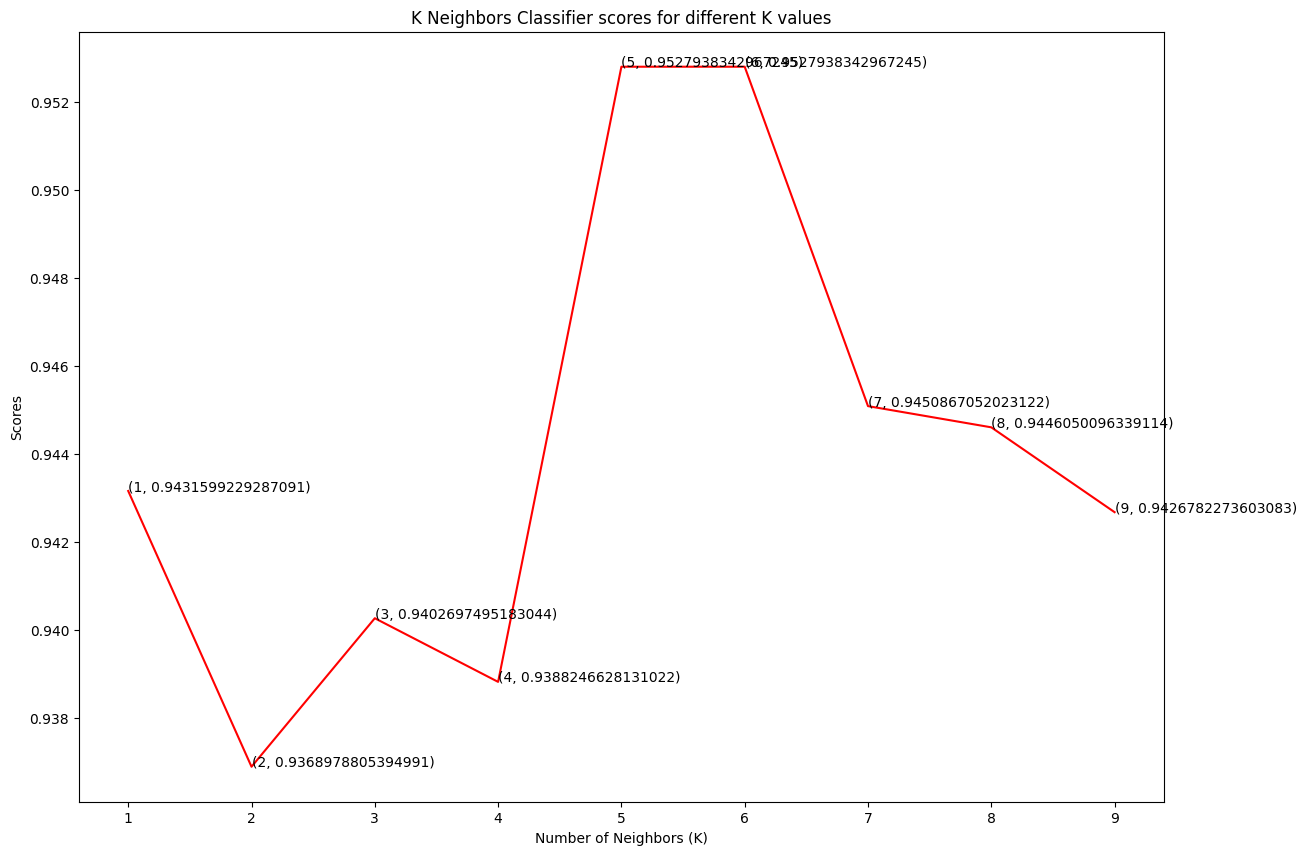

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
    
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

### Support Vector Machine

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [34]:
prediction_svm=svm.predict(X_test)
accuracy_svm= accuracy_score(y_test,prediction_svm)*100
scores_dict['SupportVectorMachine'] = accuracy_svm
accuracy_svm

98.89210019267823

In [35]:
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       861
           1       0.99      1.00      0.99      1215

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [37]:
prediction_rf=rf.predict(X_test)
accuracy_rf= accuracy_score(y_test,prediction_rf)*100
scores_dict['RandomForestClassifier'] = accuracy_rf
accuracy_rf

98.41040462427746

In [38]:
print(classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       861
           1       0.98      0.99      0.99      1215

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



### Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
prediction_lr=lr.predict(X_test)
accuracy_lr= accuracy_score(y_test,prediction_lr)*100
scores_dict['LogisticRegression'] = accuracy_lr
accuracy_lr

98.65125240847784

In [41]:
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       861
           1       0.98      0.99      0.99      1215

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



XGBoost Clasifier

In [42]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create and train the XGBoost classifier
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the classifier
accuracy_xg = accuracy_score(y_test, predictions)*100
print(f'Accuracy: {accuracy_xg}')


Accuracy: 98.79576107899807


In [44]:

# Display additional metrics
print(classification_report(y_test, predictions))
scores_dict['xgboost'] = accuracy_xg


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       861
           1       0.99      0.99      0.99      1215

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [45]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [46]:
prediction_clf=clf.predict(X_test)
accuracy_clf= accuracy_score(y_test,prediction_clf)*100
scores_dict['naive_bayes'] = accuracy_clf
accuracy_clf

97.25433526011561

In [47]:
print(classification_report(y_test,prediction_clf))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       861
           1       0.97      0.99      0.98      1215

    accuracy                           0.97      2076
   macro avg       0.97      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076



In [48]:
#Accuracy Of Alogrithms
print('DecisionTree Accuracy :',accuracy_dt)
print('KNN Algorithm Accuracy :',accuracy_knn)
print('SVM Accuracy :',accuracy_svm)
print('RandomForest Accuracy :',accuracy_rf)
print('LogisticRegression Accuracy :',accuracy_lr)
print('Naive Bayes Accuracy :',accuracy_clf)

print('XGBoost Accuracy :',accuracy_xg)

DecisionTree Accuracy : 97.6878612716763
KNN Algorithm Accuracy : 95.27938342967245
SVM Accuracy : 98.89210019267823
RandomForest Accuracy : 98.41040462427746
LogisticRegression Accuracy : 98.65125240847784
Naive Bayes Accuracy : 97.25433526011561
XGBoost Accuracy : 98.79576107899807


In [49]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test,prediction)
cm_knn = confusion_matrix(y_test,prediction_knn)
cm_svm = confusion_matrix(y_test,prediction_svm)
cm_rf = confusion_matrix(y_test,prediction_rf)
cm_lr = confusion_matrix(y_test,prediction_lr)



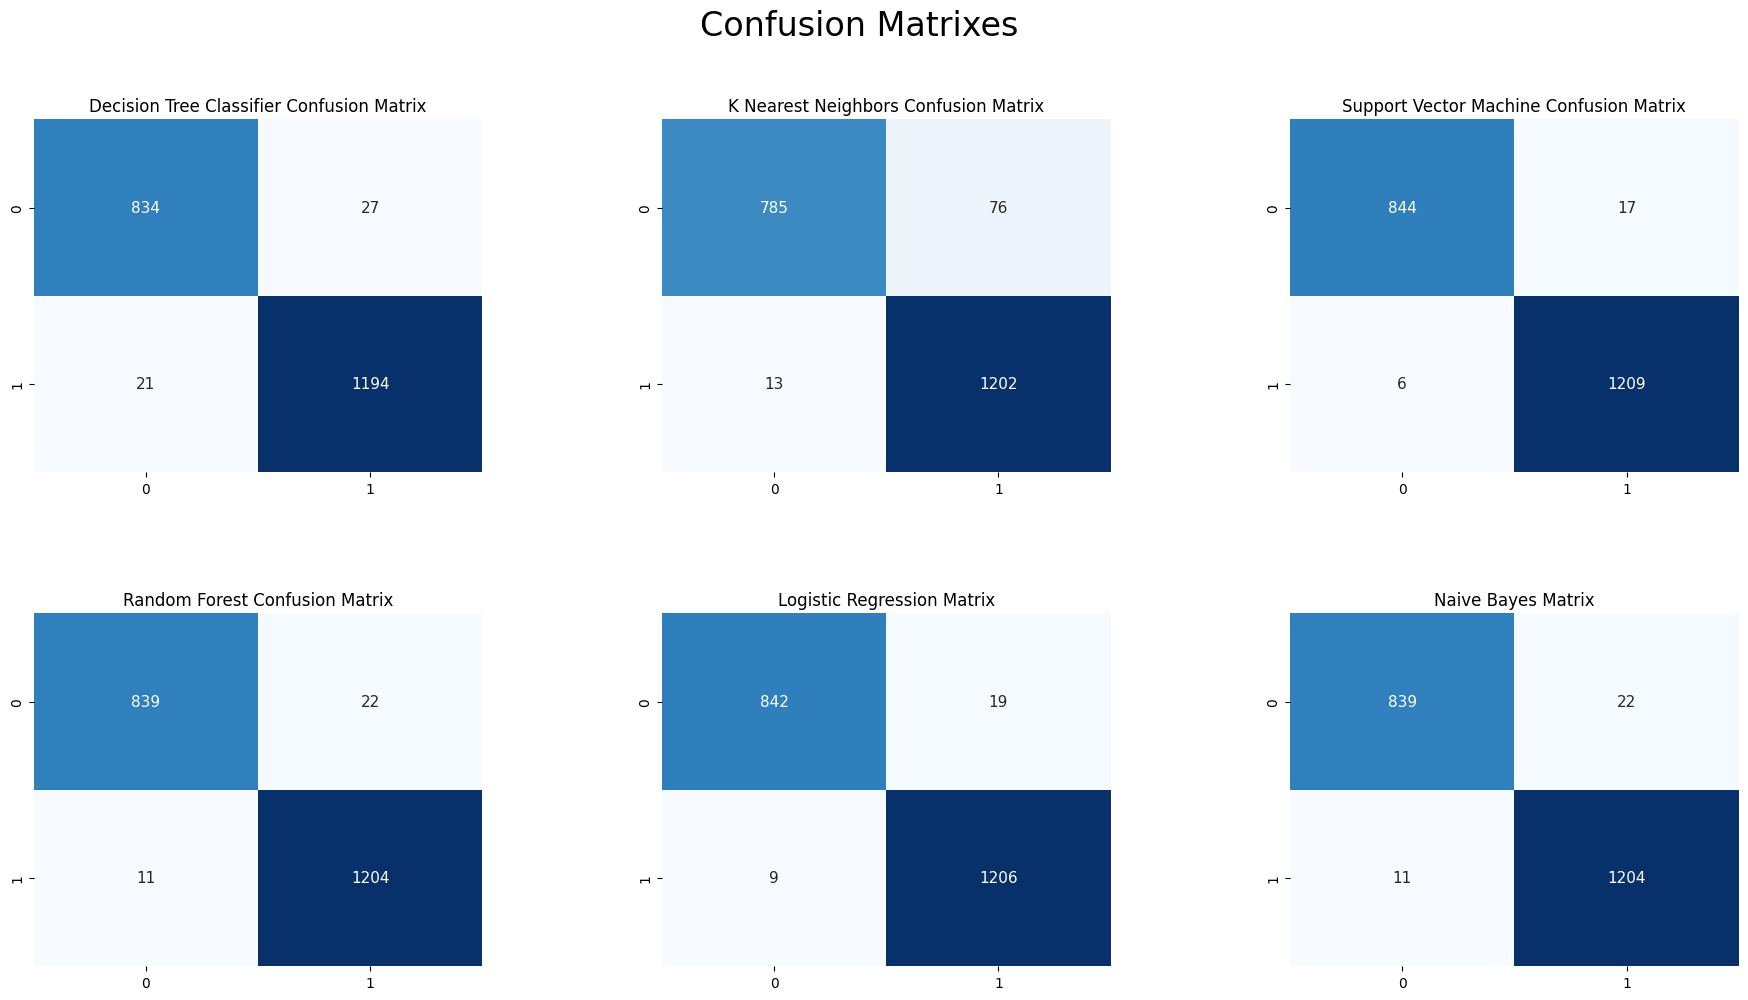

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,11))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,4)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,5)
plt.title("Logistic Regression Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,6)
plt.title("Naive Bayes Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.show()

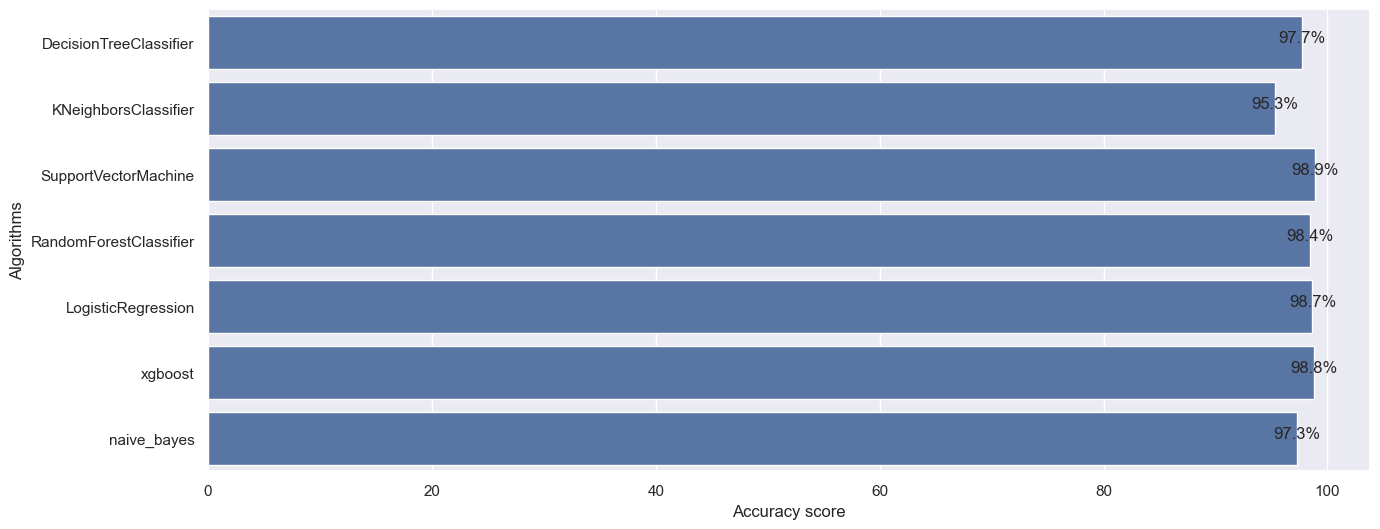

In [51]:
algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Accuracy score")
plt.ylabel("Algorithms")

ax=sns.barplot(x=scoress,y=algo_name)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

In [52]:
filename = 'svm_model.pkl'
pickle.dump(svm, open(filename, 'wb'))

In [53]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained SVM model from the pickle file
with open(filename, 'rb') as file:
    svm_model = pickle.load(file)

# Test comment
comment = "da vinci code was a terrible 💀 movie .."

# Preprocess and vectorize the comment

X_comment = vectorizer.transform([comment])

# Check the shape and content of X_comment
  # Print the actual features and their values

# Predict sentiment
predicted_sentiment = svm_model.predict(X_comment)

# Print the predicted sentiment
if predicted_sentiment == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")


Negative sentiment


In [54]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained SVM model from the pickle file
with open(filename, 'rb') as file:
    svm_model = pickle.load(file)

# Test comment
comment = "Da Vinci Code is fun 😂 to watch ."

# Preprocess and vectorize the comment

X_comment = vectorizer.transform([comment])

# Check the shape and content of X_comment
 # Print the actual features and their values

# Predict sentiment
predicted_sentiment = svm_model.predict(X_comment)

# Print the predicted sentiment
if predicted_sentiment == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")


Positive sentiment


In [55]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained SVM model from the pickle file
with open(filename, 'rb') as file:
    svm_model = pickle.load(file)

# Test comment
comment = "😍"

# Preprocess and vectorize the comment

X_comment = vectorizer.transform([comment])

# Check the shape and content of X_comment


# Predict sentiment
predicted_sentiment = svm_model.predict(X_comment)

# Print the predicted sentiment
if predicted_sentiment == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")


Positive sentiment


In [56]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained SVM model from the pickle file
with open(filename, 'rb') as file:
    svm_model = pickle.load(file)

# Test comment
comment = "😕"

# Preprocess and vectorize the comment

X_comment = vectorizer.transform([comment])

# Check the shape and content of X_comment

# Predict sentiment
predicted_sentiment = svm_model.predict(X_comment)

# Print the predicted sentiment
if predicted_sentiment == 1:
    print("Negative sentiment")
else:
    print("Positive sentiment")


Negative sentiment
